In [1]:
!scrapy crawl profiles
# only leetcode.com (should manually add LC-CN users)

In [2]:
from collections import defaultdict
from datetime import date, timedelta
import pandas as pd
import glob
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

In [22]:
today = date.today().strftime("%Y-%m-%d")
last_date = (date.today() - timedelta(weeks=1)).strftime("%Y-%m-%d")
data = pd.read_csv("hidden/solved-%s.csv" % today )

In [23]:
data.sort_values(by='solved', inplace=True)

In [24]:
total_solved = data['solved'].sum()

In [25]:
def format_pct(x, data):
    return int(round(x * total_solved / 100))

In [26]:
filter_list = [
    '策马奔腾的6希😏', 
]

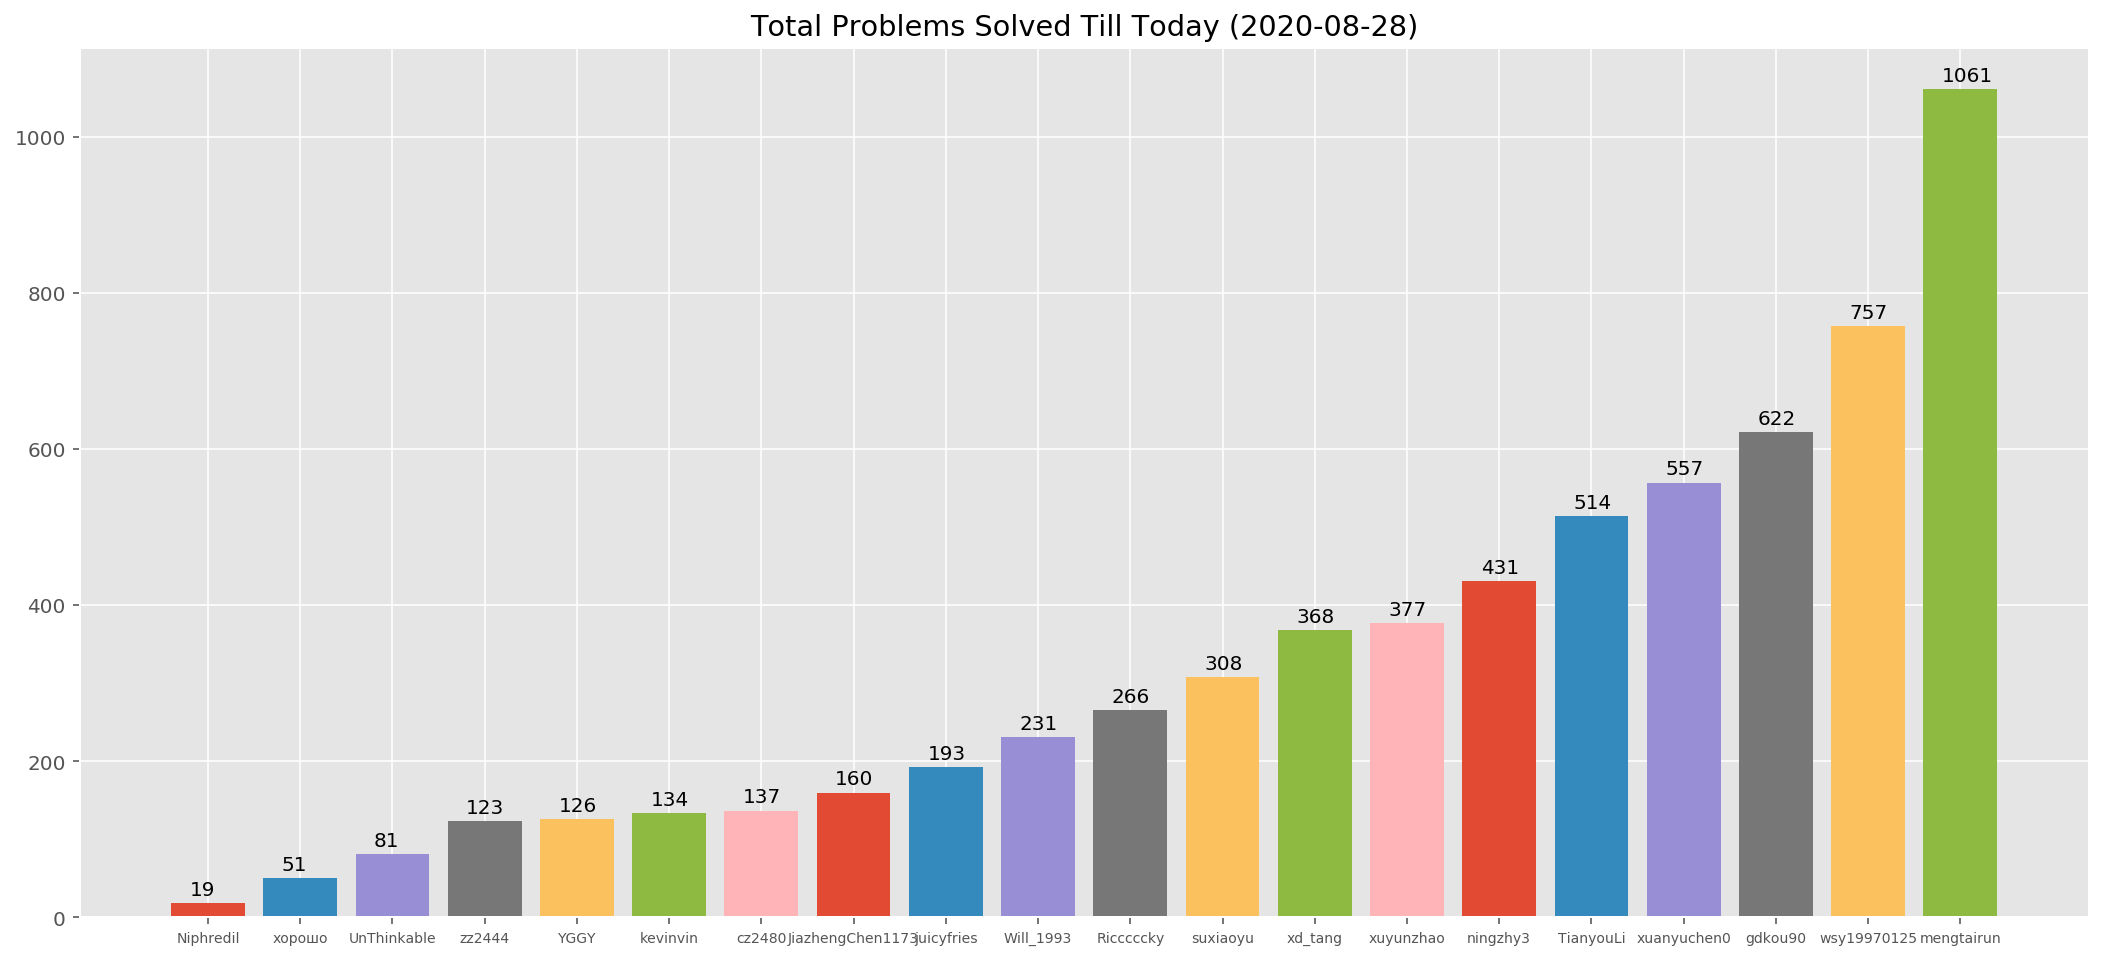

In [27]:
plt.figure(figsize=(18, 8));
plt.title('Total Problems Solved Till Today (%s)' %today)
for i, name in enumerate(data.name.unique()):
    if name in filter_list: continue
    v = int(data.query('name=="%s"' %name)['solved'])
    plt.bar(name, v)
    plt.text(i-0.2, v+10, v)

plt.xticks(fontsize=7)
plt.show();

In [29]:
df_last = pd.read_csv("hidden/solved-%s.csv" % last_date )
df2w = df_last.merge(data, on='name')
df2w['new'] = df2w['solved_y'] - df2w['solved_x']

In [30]:
df2w.sort_values(by='new', inplace=True)

In [31]:
df2w.query('new > 0', inplace=True)

In [32]:
total_new = sum(df2w['new'])

### Bar plot of last week data

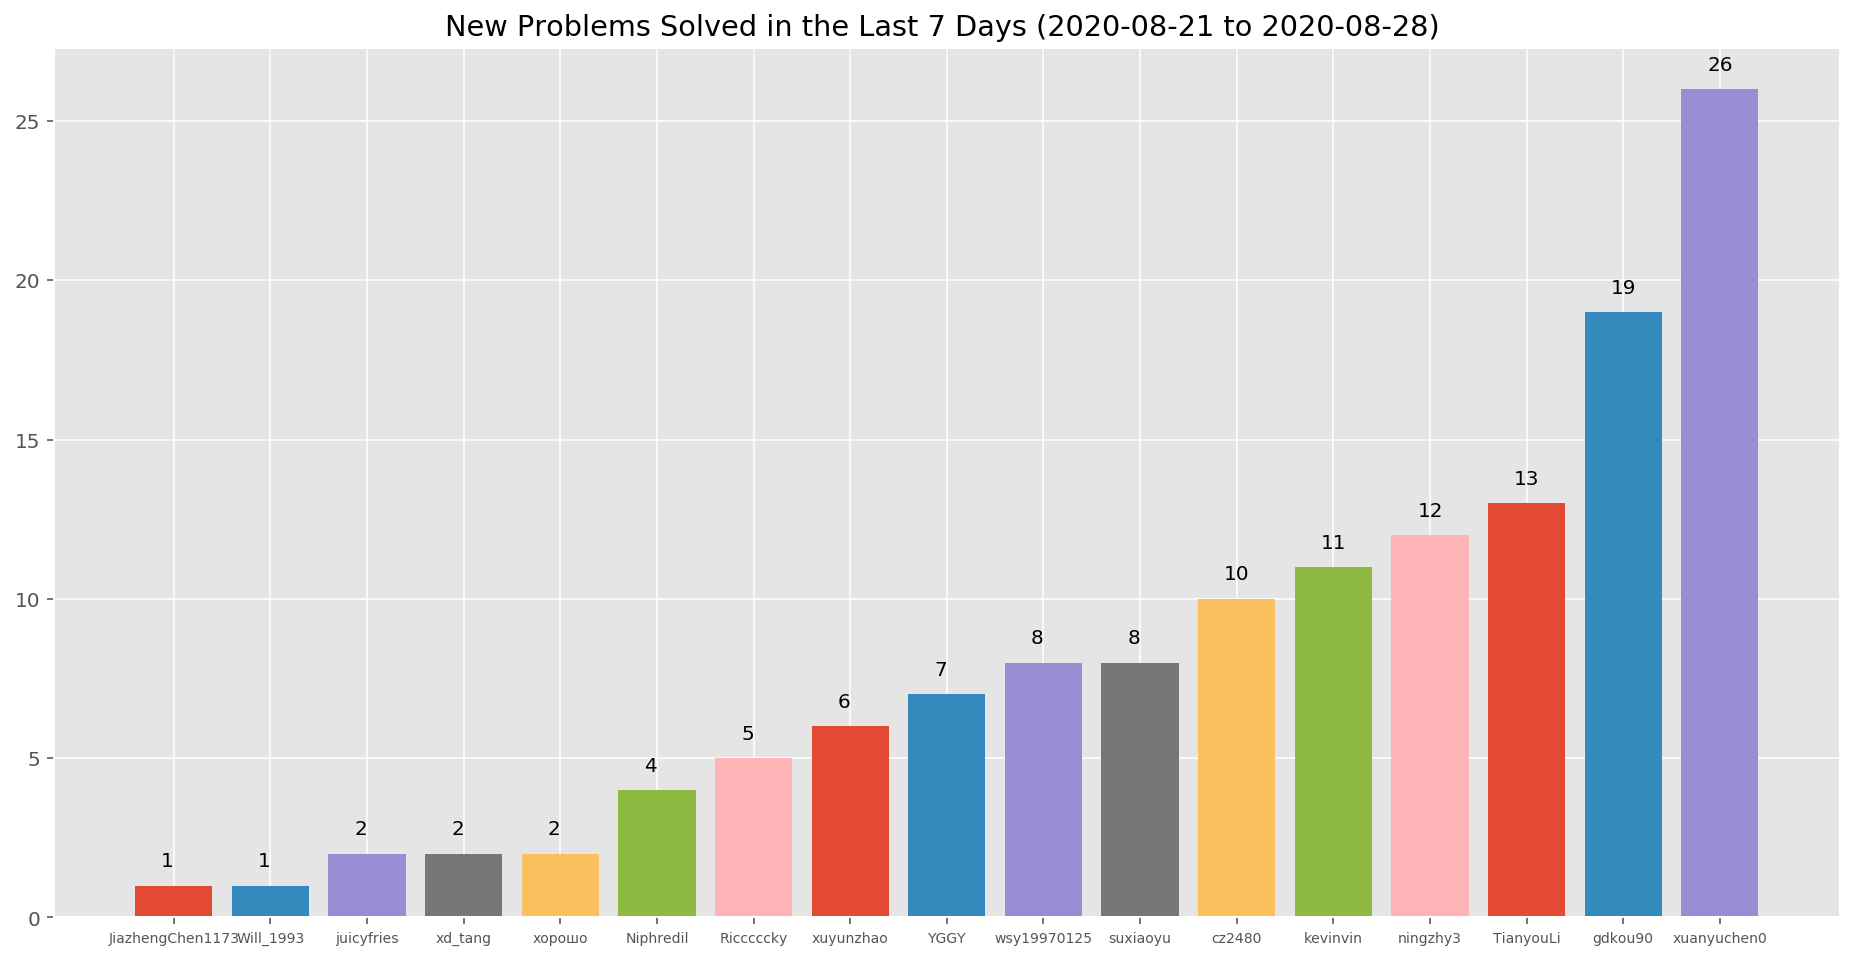

In [33]:
plt.figure(figsize=(16, 8));
plt.title('New Problems Solved in the Last 7 Days (%s to %s) ' % (last_date, today))
for i, name in enumerate(df2w.name.unique()):
    if name in filter_list: continue
    v = int(df2w.query('name=="%s"' %name)['new'])
    plt.bar(name, v)
    plt.text(i-0.13, v+0.6, v)
plt.xticks(fontsize=7)
plt.show();

## Plot historical trend data

In [35]:
files = glob.glob('hidden/solved-*.csv')

In [36]:
df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

In [37]:
df.sort_values(by=['date', 'solved'], inplace=True)

In [38]:
offsets = defaultdict(int)

In [39]:
offsets.update({'cz2480': 5, 'YGGY':-5})

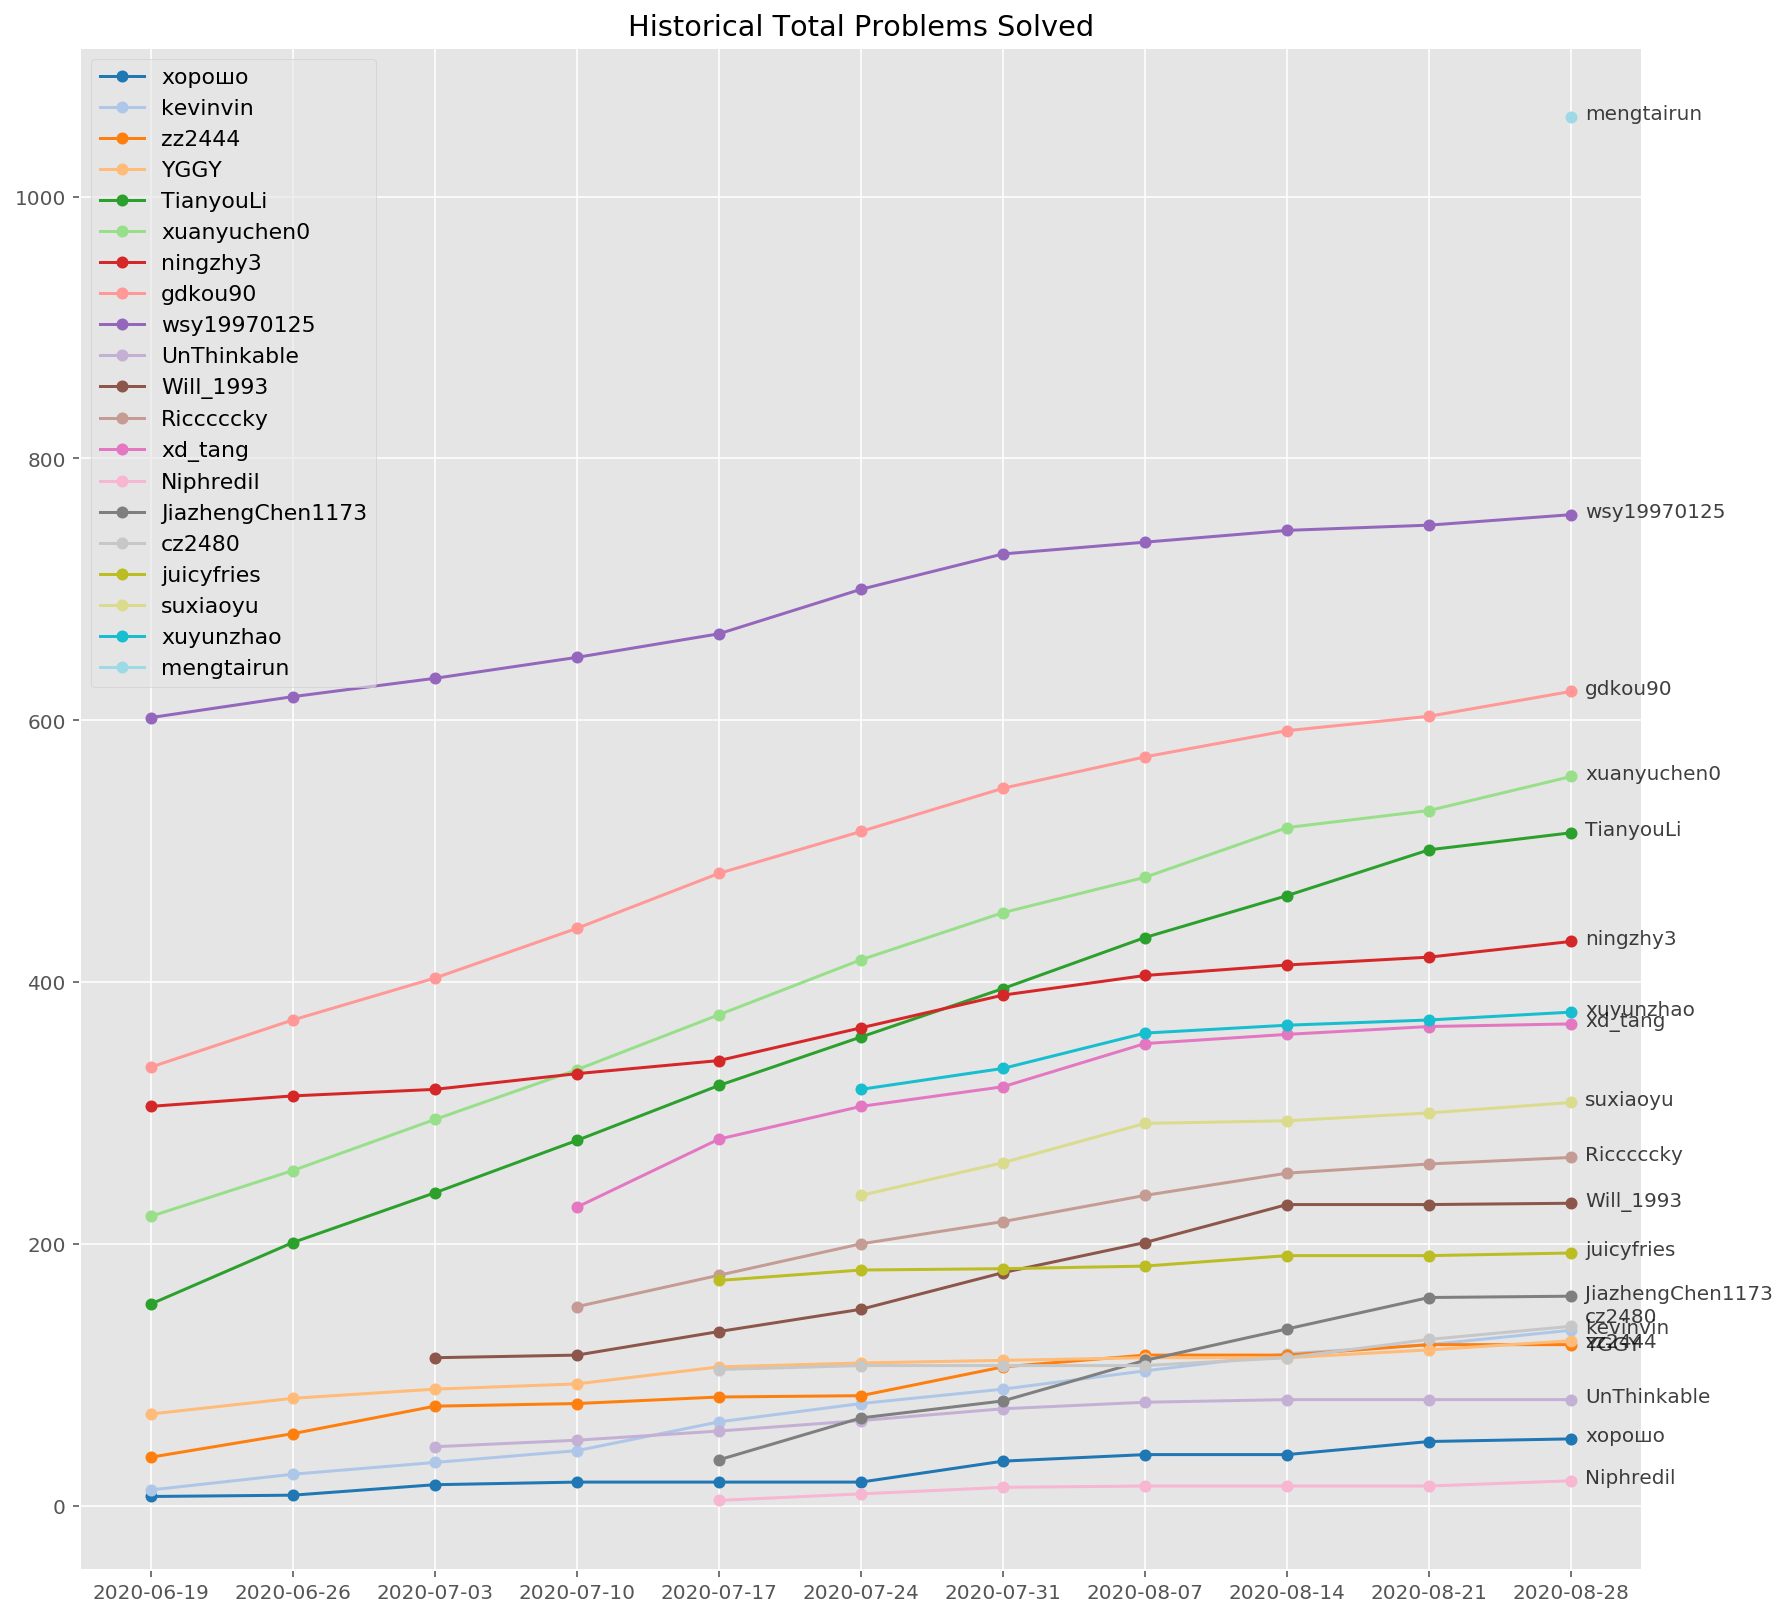

In [40]:
plt.style.use('ggplot')
with plt.style.context({"axes.prop_cycle" : plt.cycler("color", plt.cm.tab20.colors)}):
    plt.figure(figsize=(14, 14));
    plt.title('Historical Total Problems Solved')
    for name in df.name.unique():
        if name in filter_list: continue
        queried = df.query('name=="%s"' %name)
        plt.plot(sorted(queried['date']), sorted(queried['solved']), label=name, marker='o', markersize=5);
        plt.text(len(files) - 0.9, max(queried['solved'])-2 + offsets[name], name, {'color': 'k', 'fontsize': 10, 'alpha': 0.75})
    plt.legend(loc='upper left', prop={"size":11}, framealpha=0.6);
    plt.show();